In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

In [2]:
df = pd.read_csv('./time_series_covid19_confirmed_US.csv')
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,5184,5198,5227,5257,5270,5327,5358,5376,5407,5440
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,16251,16346,16513,16653,16798,16981,17128,17256,17333,17496
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1729,1730,1738,1760,1778,1793,1805,1827,1834,1882
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2151,2162,2170,2188,2198,2212,2223,2223,2229,2247
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,5304,5308,5320,5376,5411,5439,5462,5473,5485,5517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,2685,2753,2769,2788,2847,2870,2870,2931,2981,2993
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,1817,1833,1843,1852,1874,1887,1887,1900,1913,1925
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,843,844,846,846,848,853,853,858,861,863


In [3]:
date = df.columns[-1]
latest_count = df.loc[df.Province_State == 'California', ['Admin2', date]]
latest_count = latest_count.sort_values(by=date, ascending=False)
latest_count.head(10)

,Admin2,1/26/21
213,Los Angeles,1085488
231,San Bernardino,268542
228,Riverside,266849
224,Orange,239175
232,San Diego,230066
238,Santa Clara,99174
209,Kern,91119
204,Fresno,86336
229,Sacramento,84653
195,Alameda,71298


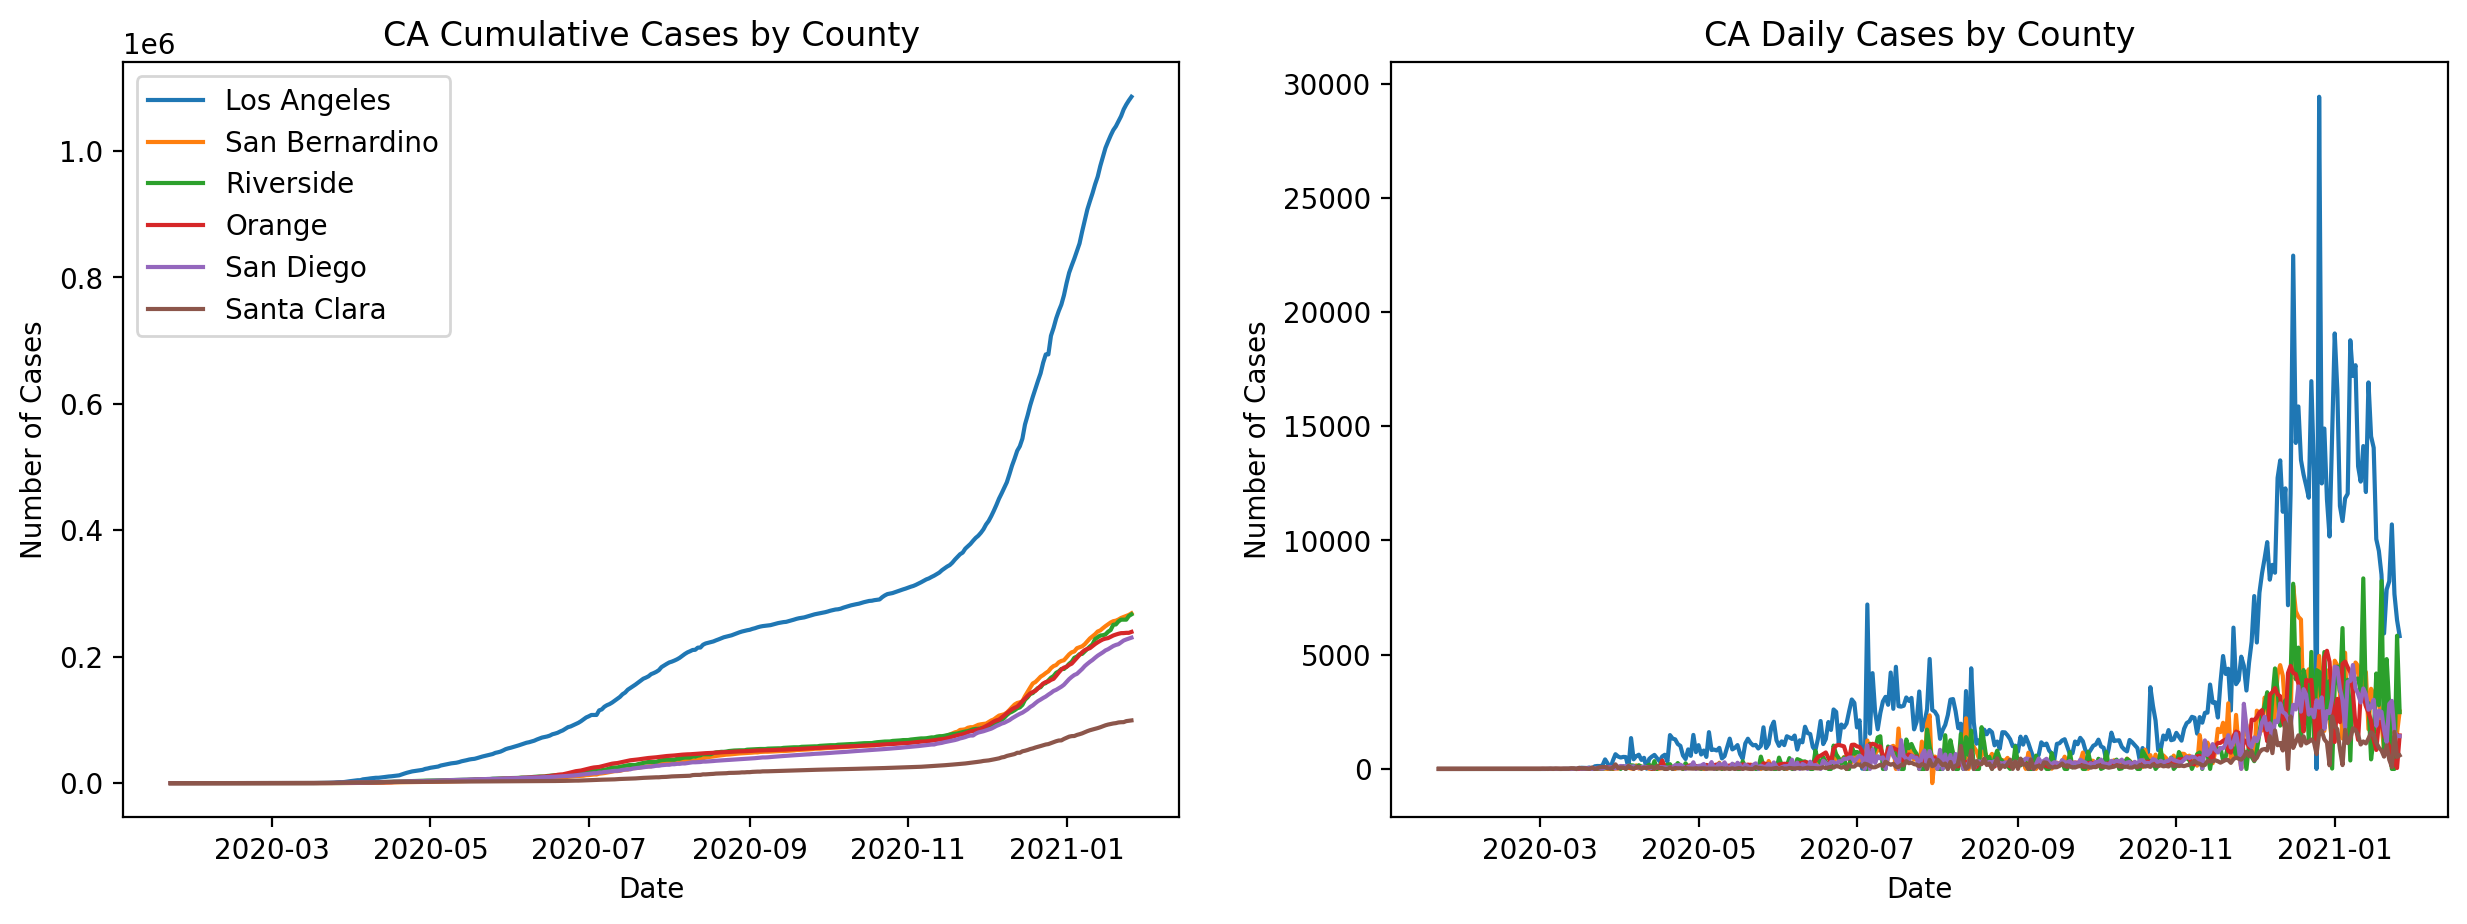

In [4]:
n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    ax[0].plot(dates, cases)
    
    cases = [0] + [cases[i]-cases[i-1] for i in range(1, len(cases))]
    ax[1].plot(dates, cases)
    
ax[0].legend(county)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases')
ax[1].set_ylabel('Number of Cases')

ax[0].set_title('CA Cumulative Cases by County')
ax[1].set_title('CA Daily Cases by County')

plt.savefig('covid_cases_ca_county', bbox_inches='tight')

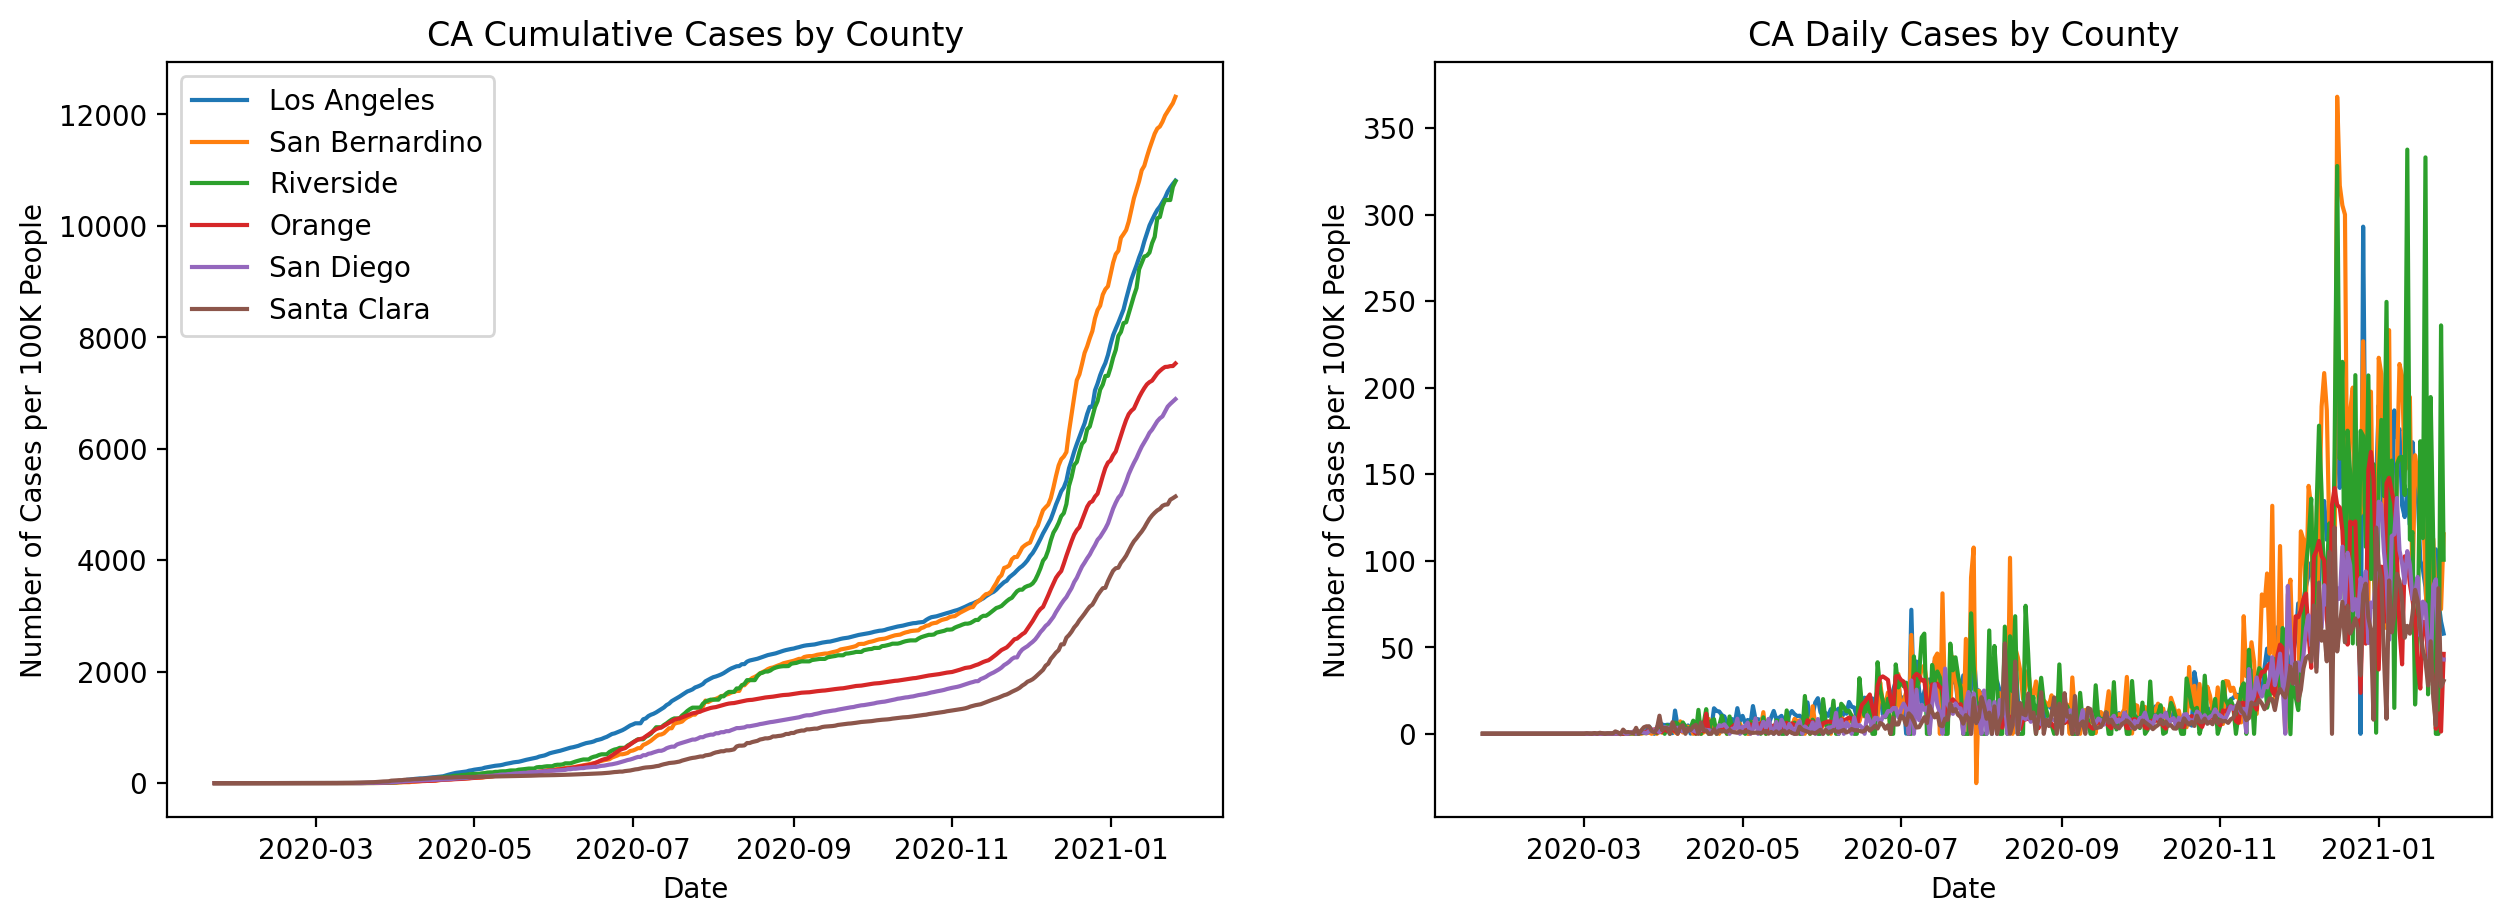

In [5]:
# county population (https://en.wikipedia.org/wiki/List_of_counties_in_California)
pop = {
    'Los Angeles': 10039107,
    'San Diego': 3338330,
    'Orange': 3175692,
    'Riverside': 2470546,
    'San Bernardino': 2180085,
    'Santa Clara': 1927852
}

n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    ax[0].plot(dates, cases / pop[c] * 100000)
    
    cases = [0] + [(cases[i]-cases[i-1]) / pop[c] * 100000 for i in range(1, len(cases))]
    ax[1].plot(dates, cases)
    
ax[0].legend(county)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases per 100K People')
ax[1].set_ylabel('Number of Cases per 100K People')

ax[0].set_title('CA Cumulative Cases by County')
ax[1].set_title('CA Daily Cases by County')

plt.savefig('covid_cases_ca_county_per_capita', bbox_inches='tight')

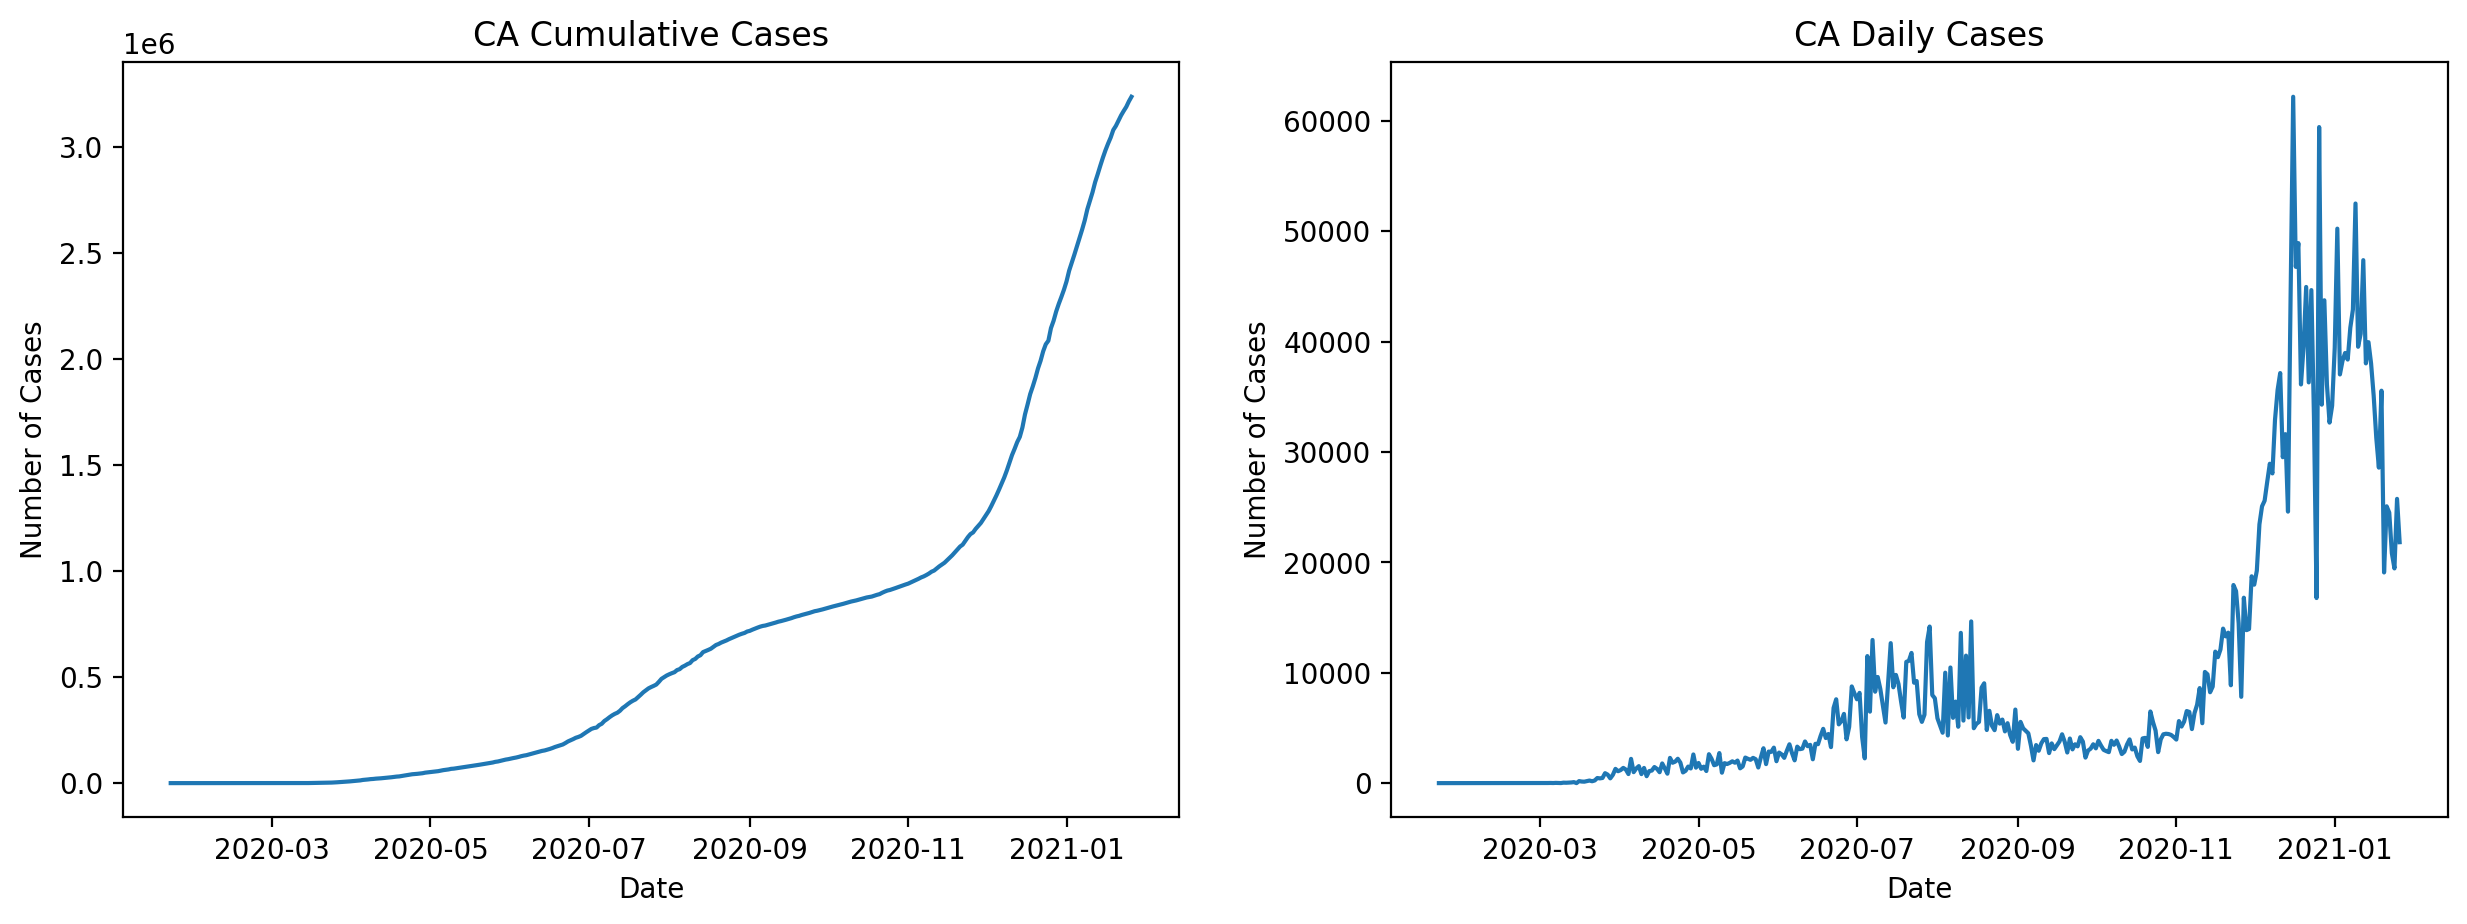

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

cases = df.loc[df.Province_State == 'California', '1/22/20':].sum()
ax[0].plot(dates, cases)

cases = [0] + [cases[i]-cases[i-1] for i in range(1, len(cases))]
ax[1].plot(dates, cases)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases')
ax[1].set_ylabel('Number of Cases')

ax[0].set_title('CA Cumulative Cases')
ax[1].set_title('CA Daily Cases')

plt.savefig('covid_cases_ca', bbox_inches='tight')